# Bike Sharing - Linear Regression - Assignment

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:
- You are required to model the demand for shared bikes with the available independent variables. 
- It will be used by the management to understand how exactly the demands vary with different features. 
- They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
- The model will be a good way for management to understand the demand dynamics of a new market. 



In [1]:
#import python libraries

import numpy as np
import pandas as pd

# plot libraries
import matplotlib.pyplot as plt
import seaborn as sns

#stat and ML libs
#scalling
from sklearn.preprocessing import MinMaxScaler

#train vs test data split
from sklearn.model_selection import train_test_split

#regression functions
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#Model validation
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


### Import and view data

In [2]:
df=pd.read_csv("day.csv")


In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
df.shape

(730, 16)

In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
##### Columns with data types

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Numerical Variables

In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### check for null data

In [10]:
df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### No Null values found in any of the 16 columns.

### check duplicate data

In [11]:
df.duplicated().sum()


0

##### No duplicate entries found in this dataset.



# EDA

## Data Cleaning

### Observations of Columns

**instant**  - record index column, not significant to the analysis. 

**casual** and **registered** used to drive the target variable **cnt**. Further these 2 variables won't be avilable during prediction, hence we these 2 variables can be dropped.

**dteday** Other features such as yr, mnth, weekday, workingday and holiday already explains this variable hence this can ber dropped.


**atemp** - **temp** and **atemp** are directly correlated hence it's sufficient to select one of these. We will use temp and drop atemp.

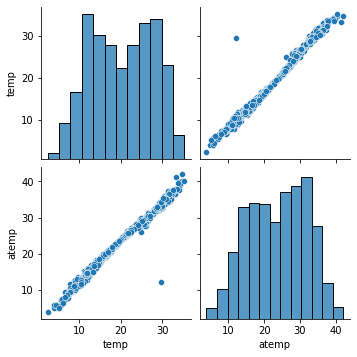

In [12]:
sns.pairplot(df[['temp','atemp']])
plt.show()

In [13]:

#### drop columns which are not significant

df.drop(['instant', 'casual','registered','dteday', 'atemp'], axis=1, inplace=True)

## Still keeping the Yr variable and we will drop it after EDA

In [14]:
df.shape 

(730, 11)

In [15]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [16]:
#df['weathersit'].value_counts()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [18]:
# prepare category variables array
category_variables = ['yr','mnth','holiday','weekday', 'workingday','season','weathersit']

In [19]:
# prepare numeric variables array
numeric_variables = ['temp', 'hum','windspeed','cnt']


In [20]:
# Convert data types of the category variables to category
df[category_variables] = df[category_variables].astype('category')

In [21]:
# numberic variables summary  
df.describe()


,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


In [22]:
# Summary view of the category type variables
df.describe(include=['category'])


,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,1,12,0,6,1,1
freq,188,365,62,709,105,499,463


## Categorical variables with numerical representations


	- season  : season (1:spring, 2:summer, 3:fall, 4:winter)
	- mnth : month ( 1 to 12)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### These numerical values can be mapped to respective values

In [23]:
print('========Season Before Update =============')
print(df['season'].unique())

df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

print('========Season After Update =============')
print(df['season'].unique())


========Season Before Update =============
[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
========Season After Update =============
[spring, summer, fall, winter]
Categories (4, object): [spring, summer, fall, winter]


In [24]:
print('========Season Before Update =============')

print(df['mnth'].unique())

df['mnth'] = df['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})

print('========Season After Update =============')
print(df['mnth'].unique())


========Season Before Update =============
[1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
========Season After Update =============
[jan, feb, mar, apr, may, ..., aug, sep, oct, nov, dec]
Length: 12
Categories (12, object): [jan, feb, mar, apr, ..., sep, oct, nov, dec]


In [25]:
print('========Season Before Update =============')
print(df['weekday'].unique())

df['weekday'] = df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

print('========Season After Update =============')
print(df['weekday'].unique())


========Season Before Update =============
[6, 0, 1, 2, 3, 4, 5]
Categories (7, int64): [6, 0, 1, 2, 3, 4, 5]
========Season After Update =============
[Sat, Sun, Mon, Tue, Wed, Thu, Fri]
Categories (7, object): [Sat, Sun, Mon, Tue, Wed, Thu, Fri]


In [26]:
print('========Season Before Update =============')

print(df['weathersit'].unique())

df['weathersit'] = df['weathersit'].map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 4: 'HeavyRain_IcePallets'})

print('========Season After Update =============')
print(df['weathersit'].unique())


========Season Before Update =============
[2, 1, 3]
Categories (3, int64): [2, 1, 3]
========Season After Update =============
[Mist_Cloudy, Clear_FewClouds, LightSnow_LightRain]
Categories (3, object): [Mist_Cloudy, Clear_FewClouds, LightSnow_LightRain]


## Numerical variables

In [27]:
def hist_box_plot(df,field):
        print(df[field].describe(percentiles=[0.15,0.2,0.25,0.5,0.7,0.75,0.8,0.85]))
        sns.set(style="whitegrid")
        sns.set_palette('RdBu')
        fig, ax=plt.subplots(1,2,figsize=(20,8))
        ax[0].set_title(field +" Dist Plot",fontsize=18)
        
        ax[0].xaxis.label.set_color('red')
        ax[0].yaxis.label.set_color('blue')
        ax[0].set_xlabel( field , size = 16 )
        
        
        sns.distplot(df[field],ax=ax[0])
        ax[1].set_title(field +" Box Plot",fontsize=18)
        sns.boxplot(data =df, x=field,ax=ax[1],orient='v')
        ax[1].set_xlabel( field , size = 16 )

        ax[1].xaxis.label.set_color('red')
        plt.show()

### cnt Column  (output field) 

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
15%      2164.450000
20%      2653.800000
25%      3169.750000
50%      4548.500000
70%      5531.300000
75%      5966.000000
80%      6393.200000
85%      6856.300000
max      8714.000000
Name: cnt, dtype: float64


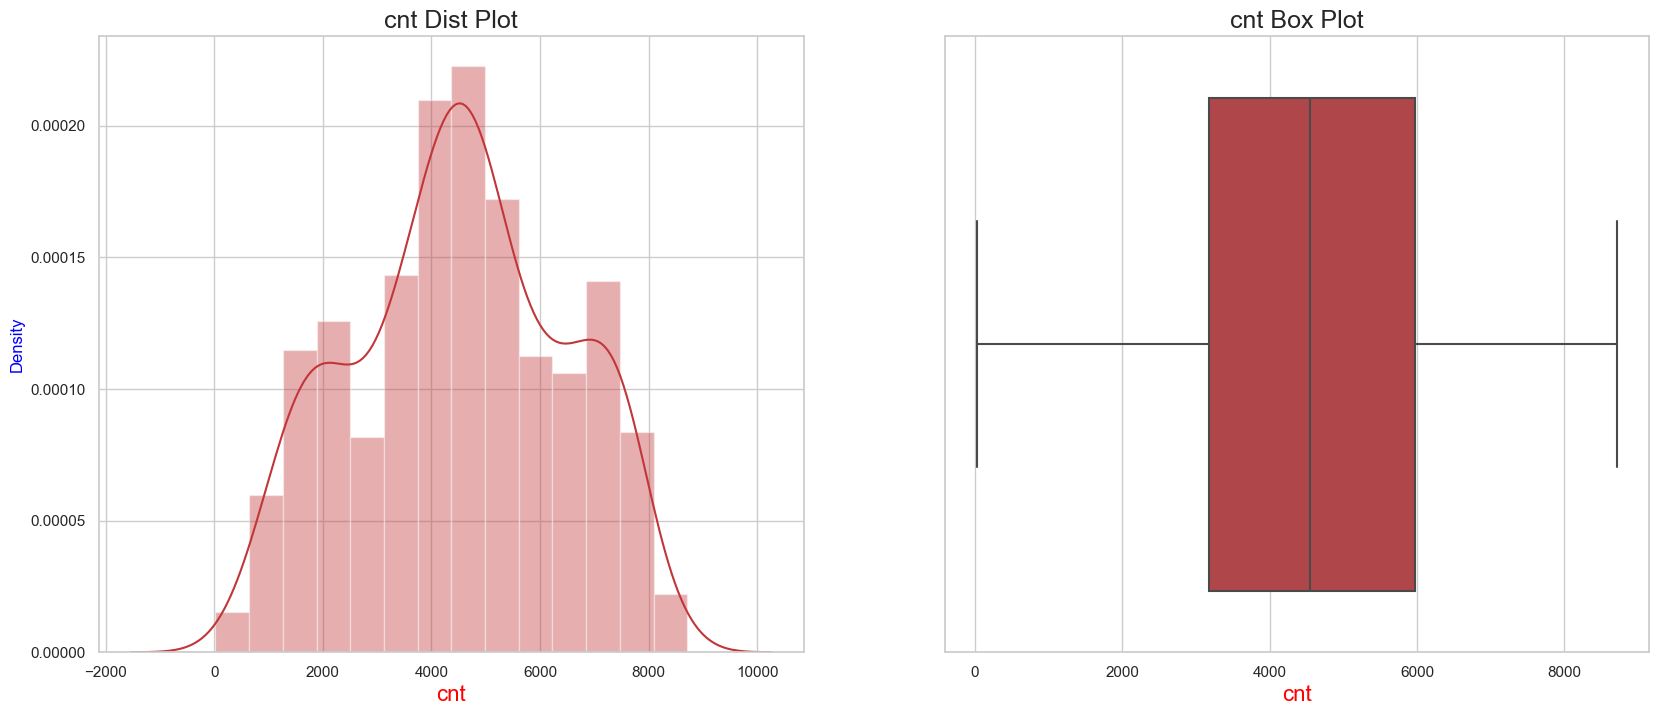

In [28]:
hist_box_plot(df=df,field='cnt')

##### Observation on **cnt** field
- cnt field data is normally distributed between 0 to 10000
- mean is 4500


### temp Column

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
15%       11.621280
20%       12.942322
25%       13.811885
50%       20.465826
70%       25.898347
75%       26.880615
80%       28.125992
85%       29.144153
max       35.328347
Name: temp, dtype: float64


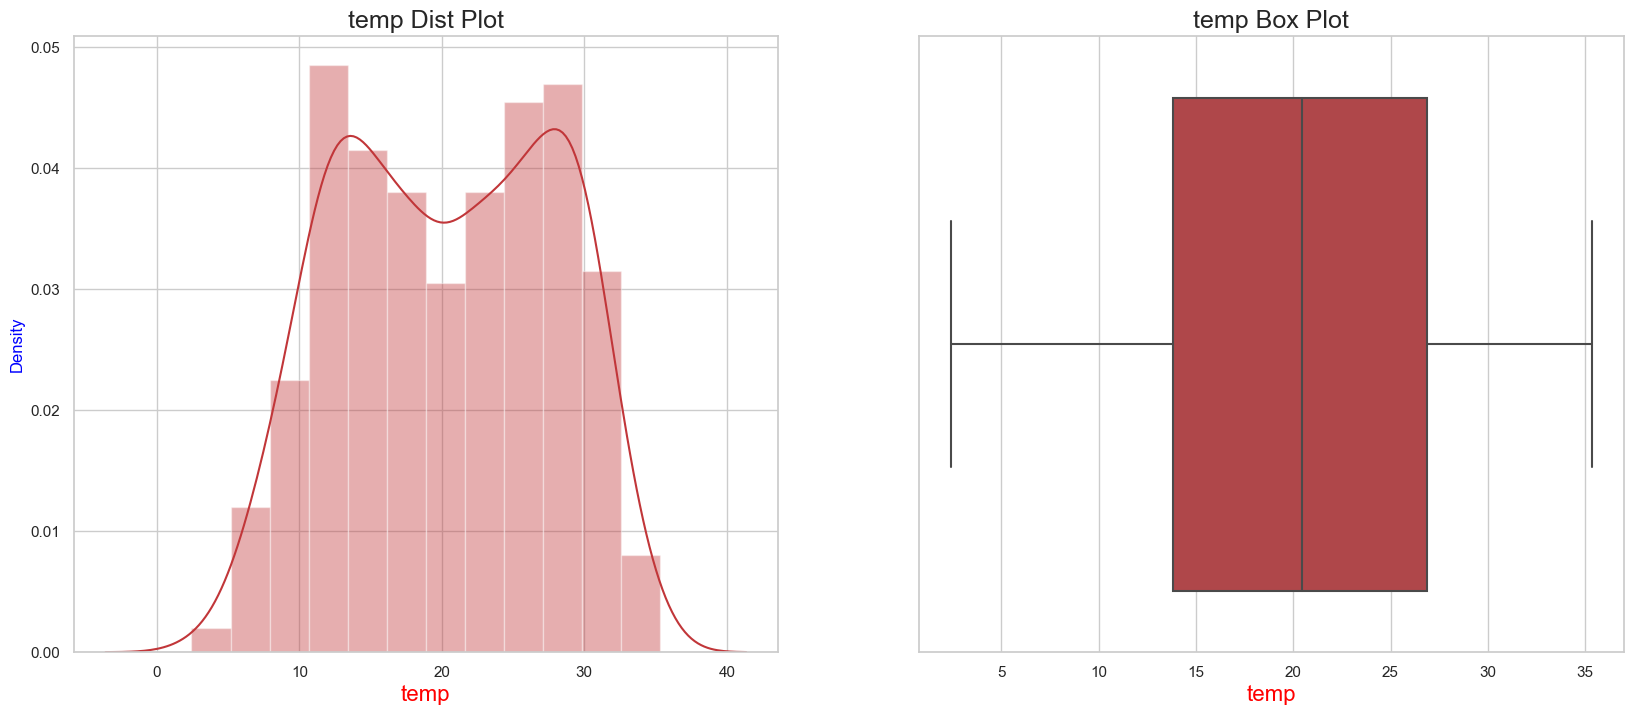

In [29]:
hist_box_plot(df=df,field='temp')

##### Observation on **temp** field
- temp data is right skewed normal distribution
- mean is 20


### humudity Column


count    730.000000
mean      62.765175
std       14.237589
min        0.000000
15%       48.183345
20%       49.975000
25%       52.000000
50%       62.625000
70%       70.750000
75%       72.989575
80%       75.291700
85%       77.568740
max       97.250000
Name: hum, dtype: float64


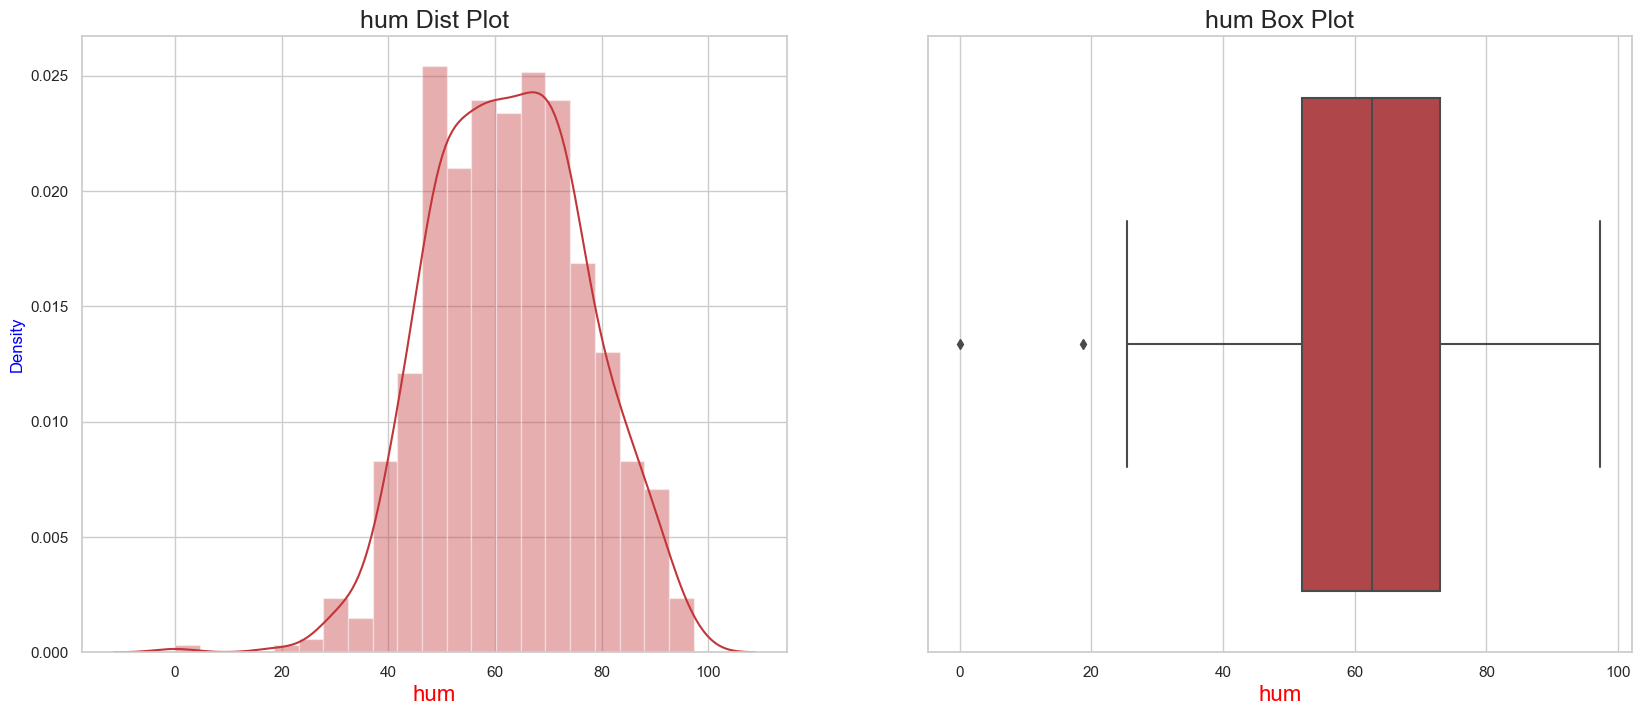

In [30]:
hist_box_plot(df=df,field='hum')


##### Observation on **hum** field
- humudity column data is right skewed normal distribution
- mean is 62
- outliers present in the humudity column

### Wind Speed Column


count    730.000000
mean      12.763620
std        5.195841
min        1.500244
15%        7.743468
20%        8.388467
25%        9.041650
50%       12.125325
70%       14.971271
75%       15.625589
80%       16.639785
85%       18.128709
max       34.000021
Name: windspeed, dtype: float64


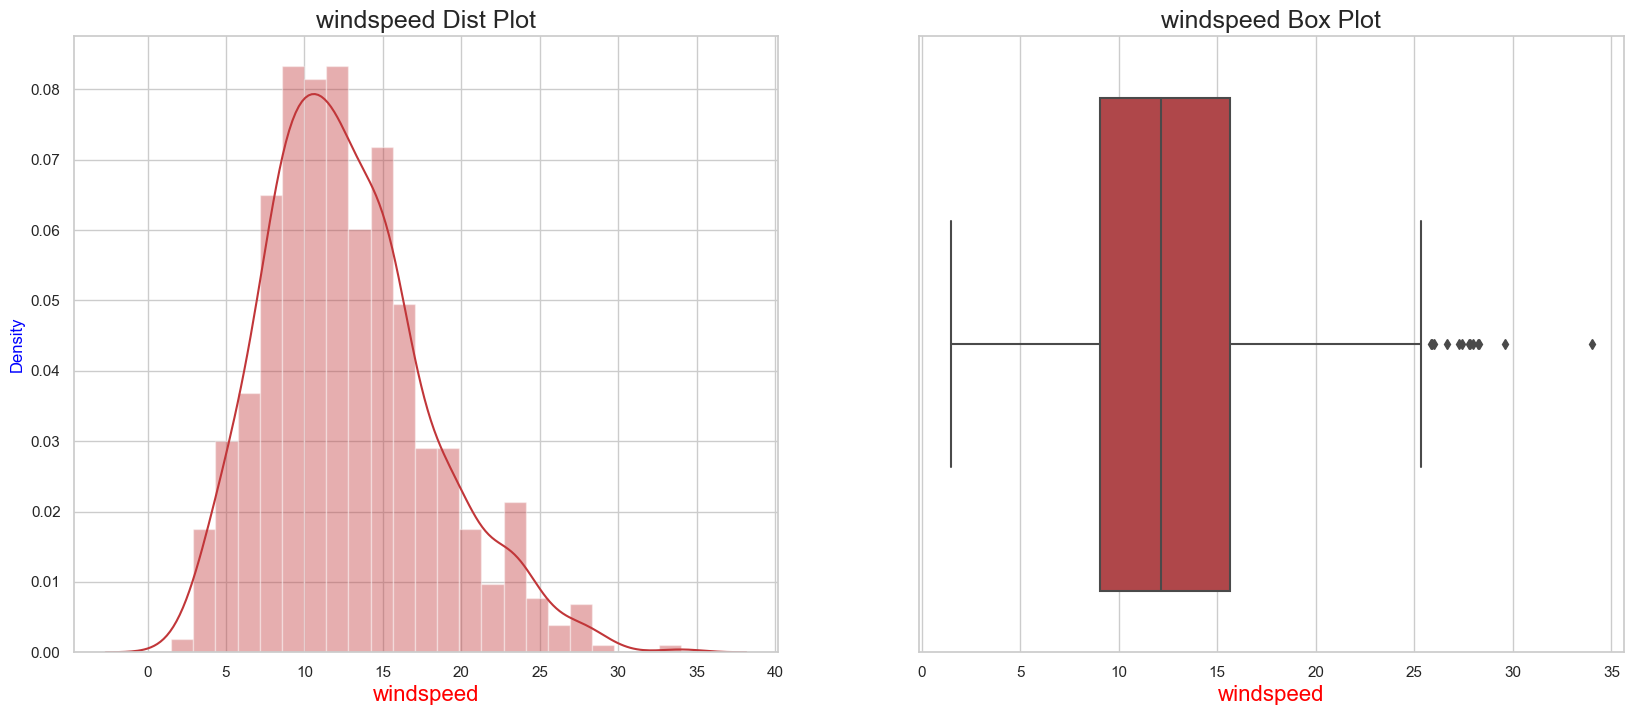

In [31]:
hist_box_plot(df=df,field='windspeed')


Observation on windspeed field
- windspeed column is normally distributed between 1 to 30
- mean is 12
- outliers present in the windspeed column

### Outlier treatment

- outliers present in **windspeed** and **hum** columns

In [32]:
def outlier_percentage_calc(x):
    q1  =  df[x].quantile(0.25)
    q3  =  df[x].quantile(0.75)
    iqr = q3-q1
    high_outliers = q3 +iqr*1.5
    low_outliers  = q1 -iqr*1.5
    perc_outlier = ((df[x]<low_outliers).sum()+(df[x]>high_outliers).sum())/len(df[x])*100
    perc_outlier = round(perc_outlier,2)
    return(perc_outlier)

**windspeed** - Outlier Pecentage

In [33]:
outlier_percentage_calc('windspeed')

1.78

**hum** - Outlier Pecentage

In [34]:
outlier_percentage_calc('hum')

0.27

#### Conclusion on outlier treatment

- Percentage of outliers of these 2 variables are very low and not significant, hence not outlier removal not required.


### Correlation between numerical variables

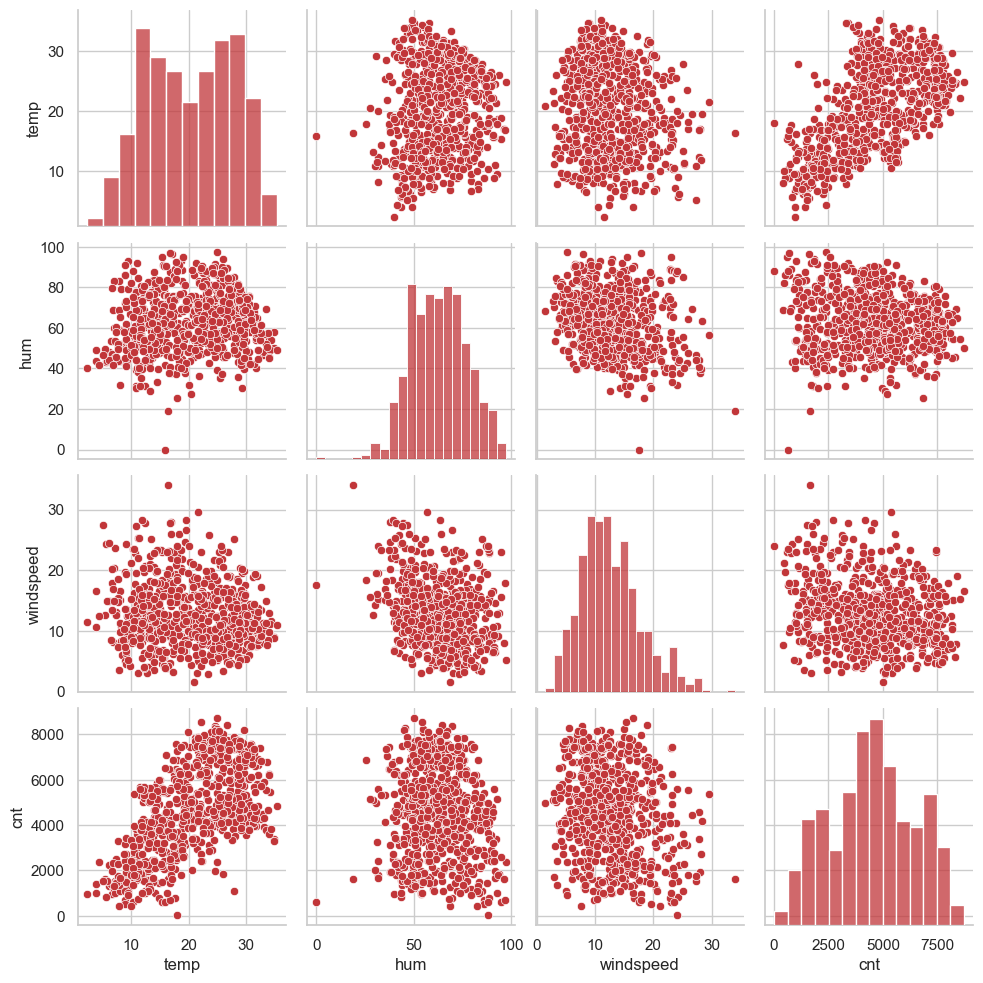

In [35]:
sns.pairplot(df[numeric_variables])
plt.show()


#### Observation
- **temp** column has the highest positive correlation with **cnt** column.



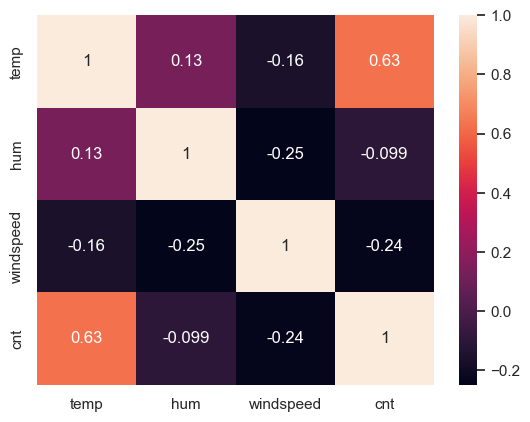

In [36]:
corr = df[numeric_variables].corr()
sns.heatmap(corr, annot= True)
plt.show()


#### Observation
- **temp** column has 0.63 positive correlation with **cnt** column.
- **hum** and **windspeed** columns has a negative corelation with **cnt** column.

## Categorical variables vs cnt (out variable)

In [37]:
def draw_category_vs_cnt_box_plots():
    plt.figure(figsize=(15,20))

    col = 2 # number of columns
    row = len(category_variables)//col+1 # number of rows
    
    for i in list(enumerate(category_variables)):
        plt.subplot(row,col,i[0]+1)
        sns.boxplot(x = i[1], y = 'cnt', data = df)
        plt.xticks(rotation = 90)
    plt.tight_layout()    
    plt.show()

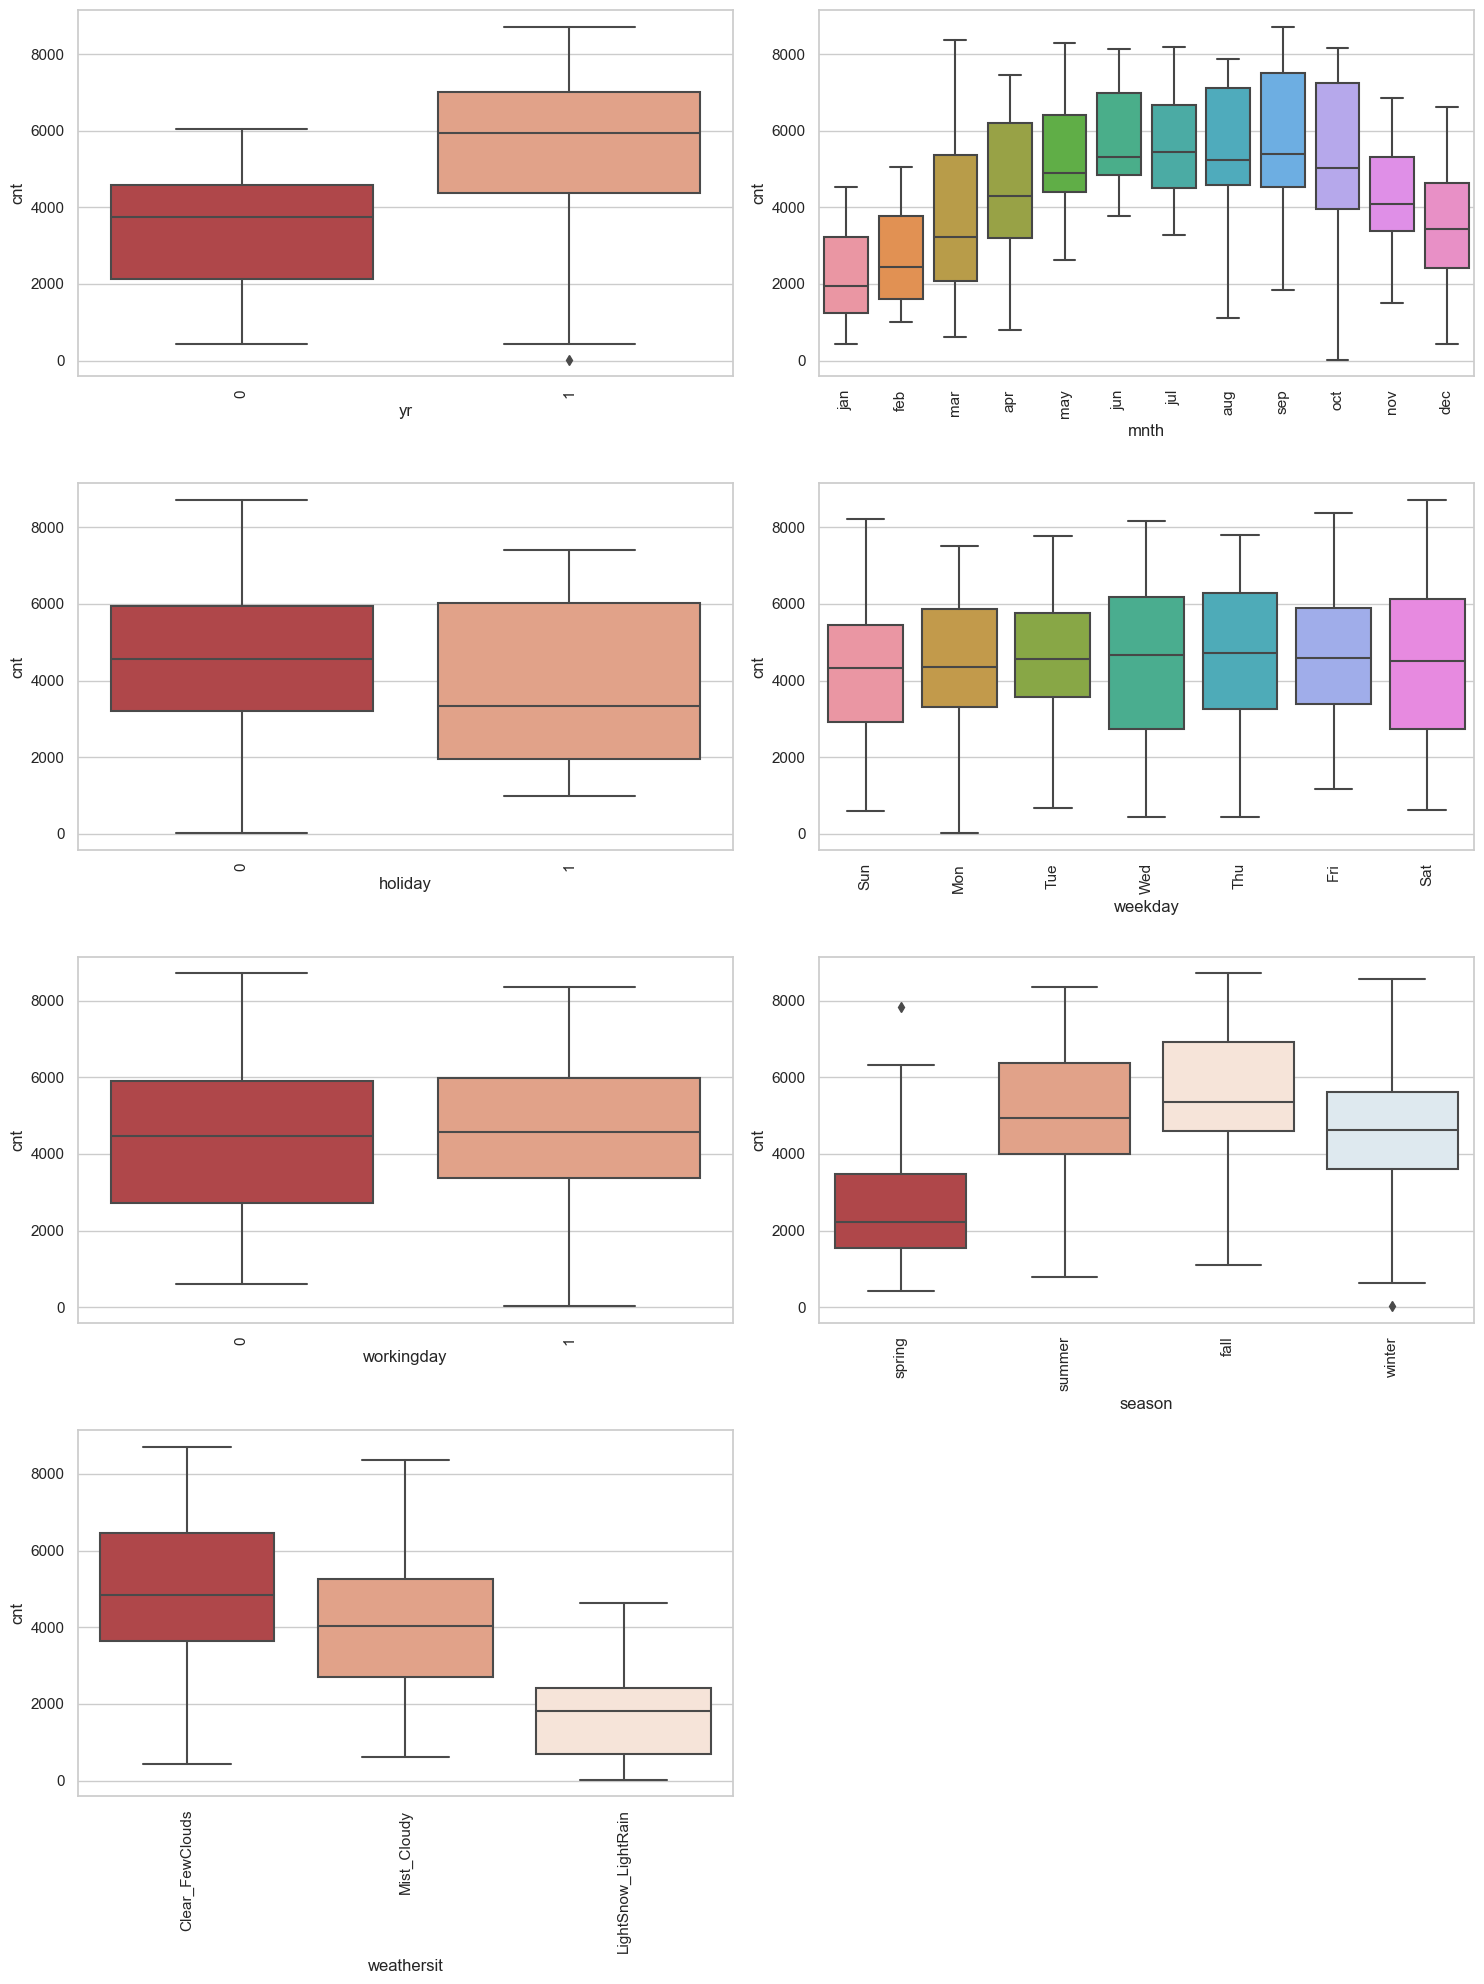

In [38]:
draw_category_vs_cnt_box_plots()

#### Categorical variables vs cnt Observation
- **Year** - Bike rental demand has been increased in significantly **2019** than the previous year.
- **Months**
    - Bike rental demand consistently increases from Jan-June
    - Highest demand observerd in the period from June to September. 
    - There is a down trend from October to December.
    - **Jan** has the lowest demand while **September** has the highest demand.
- **Weekday**
    - Demand between Mon-Fri slightly higher than weekends.
- **Holiday**
    - There is a low demand on holidays compare to the non holidays.
- **Working Day**
    - Demand during workdays slightly higher than non-working days.
- **Season**
    - Demand is high during **fall** season while demand is low during **spring** season.
- **Weathersit**
    - Demand is high during **Clear, Few clouds, Partly cloudy, Partly cloudy**  while demand is low during **Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds** season
    - No data found for the **Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog** category.


## Data Preparation

#### Steps
- Create dummy variables.
- Split train and test data.
- Scale the datasets wherever applicable.
- Prepare X (Features) and Y (Out) dataframes

### Create dummy variables

##### Create dummy variables for category columns which has more than 2 values


In [39]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [40]:
non_binary_category_vars = ['mnth','season','weekday','weathersit']
cat_dummy_variables_df = pd.get_dummies(df[non_binary_category_vars],drop_first=True)

# Create new Dataframe with dummy variables
df_for_modeling = pd.concat([df,cat_dummy_variables_df], axis = 1)

# drop original columns as these are 
df_for_modeling.drop(non_binary_category_vars , axis=1, inplace=True)

In [41]:
df_for_modeling.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_feb,mnth_mar,mnth_apr,...,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
df_for_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   yr                              730 non-null    category
 1   holiday                         730 non-null    category
 2   workingday                      730 non-null    category
 3   temp                            730 non-null    float64 
 4   hum                             730 non-null    float64 
 5   windspeed                       730 non-null    float64 
 6   cnt                             730 non-null    int64   
 7   mnth_feb                        730 non-null    uint8   
 8   mnth_mar                        730 non-null    uint8   
 9   mnth_apr                        730 non-null    uint8   
 10  mnth_may                        730 non-null    uint8   
 11  mnth_jun                        730 non-null    uint8   
 12  mnth_jul              

#####  dummy variables for category columns which has exactly 2 values (binary type)

- Columns "**yr, holiday and workingday**" are category variables which has only 0 and 1 as values.
- These can be converted to **uint8** as the values of other dummy variables

In [43]:
cat_columns_to_uint8 = ['yr','workingday','holiday']
df_for_modeling[cat_columns_to_uint8]= df[cat_columns_to_uint8].astype('uint8')
df_for_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    uint8  
 1   holiday                         730 non-null    uint8  
 2   workingday                      730 non-null    uint8  
 3   temp                            730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   mnth_feb                        730 non-null    uint8  
 8   mnth_mar                        730 non-null    uint8  
 9   mnth_apr                        730 non-null    uint8  
 10  mnth_may                        730 non-null    uint8  
 11  mnth_jun                        730 non-null    uint8  
 12  mnth_jul                        730 

### Split train and test datasets.
- we are doing 70:30 train vs test split

In [44]:
# we are doing 70:30 train vs test split
df_train, df_test = train_test_split(df_for_modeling, train_size = 0.7, random_state = 10 )
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Scale the features

- Following numerical fields has large numerical values in different ranges. Scaling them would help for better feature comparions
- Min-Max scalling used here to scale these data.
- Columns
    - temp
    - hum
    - windspeed
    - cnt
- Both Train and Test sets to be rescaled

In [45]:
minMaxScaler = MinMaxScaler()

##### Scaling - Train data

In [46]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_feb,mnth_mar,mnth_apr,...,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
72,0,0,1,13.333897,49.6957,9.174042,2046,0,1,0,...,0,0,1,0,0,0,0,0,0,0
510,1,0,0,28.392500,73.2500,13.332464,6536,0,0,0,...,0,0,0,0,0,0,0,1,0,0
700,1,0,0,14.247500,82.3333,8.333393,4649,0,0,0,...,0,1,0,0,0,0,0,0,1,0
264,0,0,1,25.761653,90.2083,8.584375,4795,0,0,0,...,1,0,0,0,0,1,0,0,1,0
577,1,0,1,29.417500,67.7500,9.458993,7580,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [47]:
df_train[numeric_variables] = minMaxScaler.fit_transform(df_train[numeric_variables])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_feb,mnth_mar,mnth_apr,...,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
72,0,0,1,0.298094,0.393891,0.236118,0.194978,0,1,0,...,0,0,1,0,0,0,0,0,0,0
510,1,0,0,0.778657,0.694105,0.364071,0.737052,0,0,0,...,0,0,0,0,0,0,0,1,0,0
700,1,0,0,0.327249,0.809877,0.210252,0.509236,0,0,0,...,0,1,0,0,0,0,0,0,1,0
264,0,0,1,0.694699,0.910249,0.217975,0.526862,0,0,0,...,1,0,0,0,0,1,0,0,1,0
577,1,0,1,0.811368,0.624004,0.244886,0.863093,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [48]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_feb,mnth_mar,mnth_apr,...,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.033333,0.690196,0.513354,0.563841,0.342904,0.492000,0.076471,0.084314,0.088235,...,0.235294,0.260784,0.147059,0.149020,0.152941,0.137255,0.137255,0.147059,0.345098,0.033333
std,0.500429,0.179682,0.462867,0.233194,0.183851,0.162760,0.236196,0.266010,0.278131,0.283915,...,0.424599,0.439494,0.354512,0.356457,0.360284,0.344454,0.344454,0.354512,0.475867,0.179682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.314983,0.426048,0.225964,0.325456,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.506613,0.562400,0.322431,0.490945,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.721686,0.697621,0.434281,0.675812,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


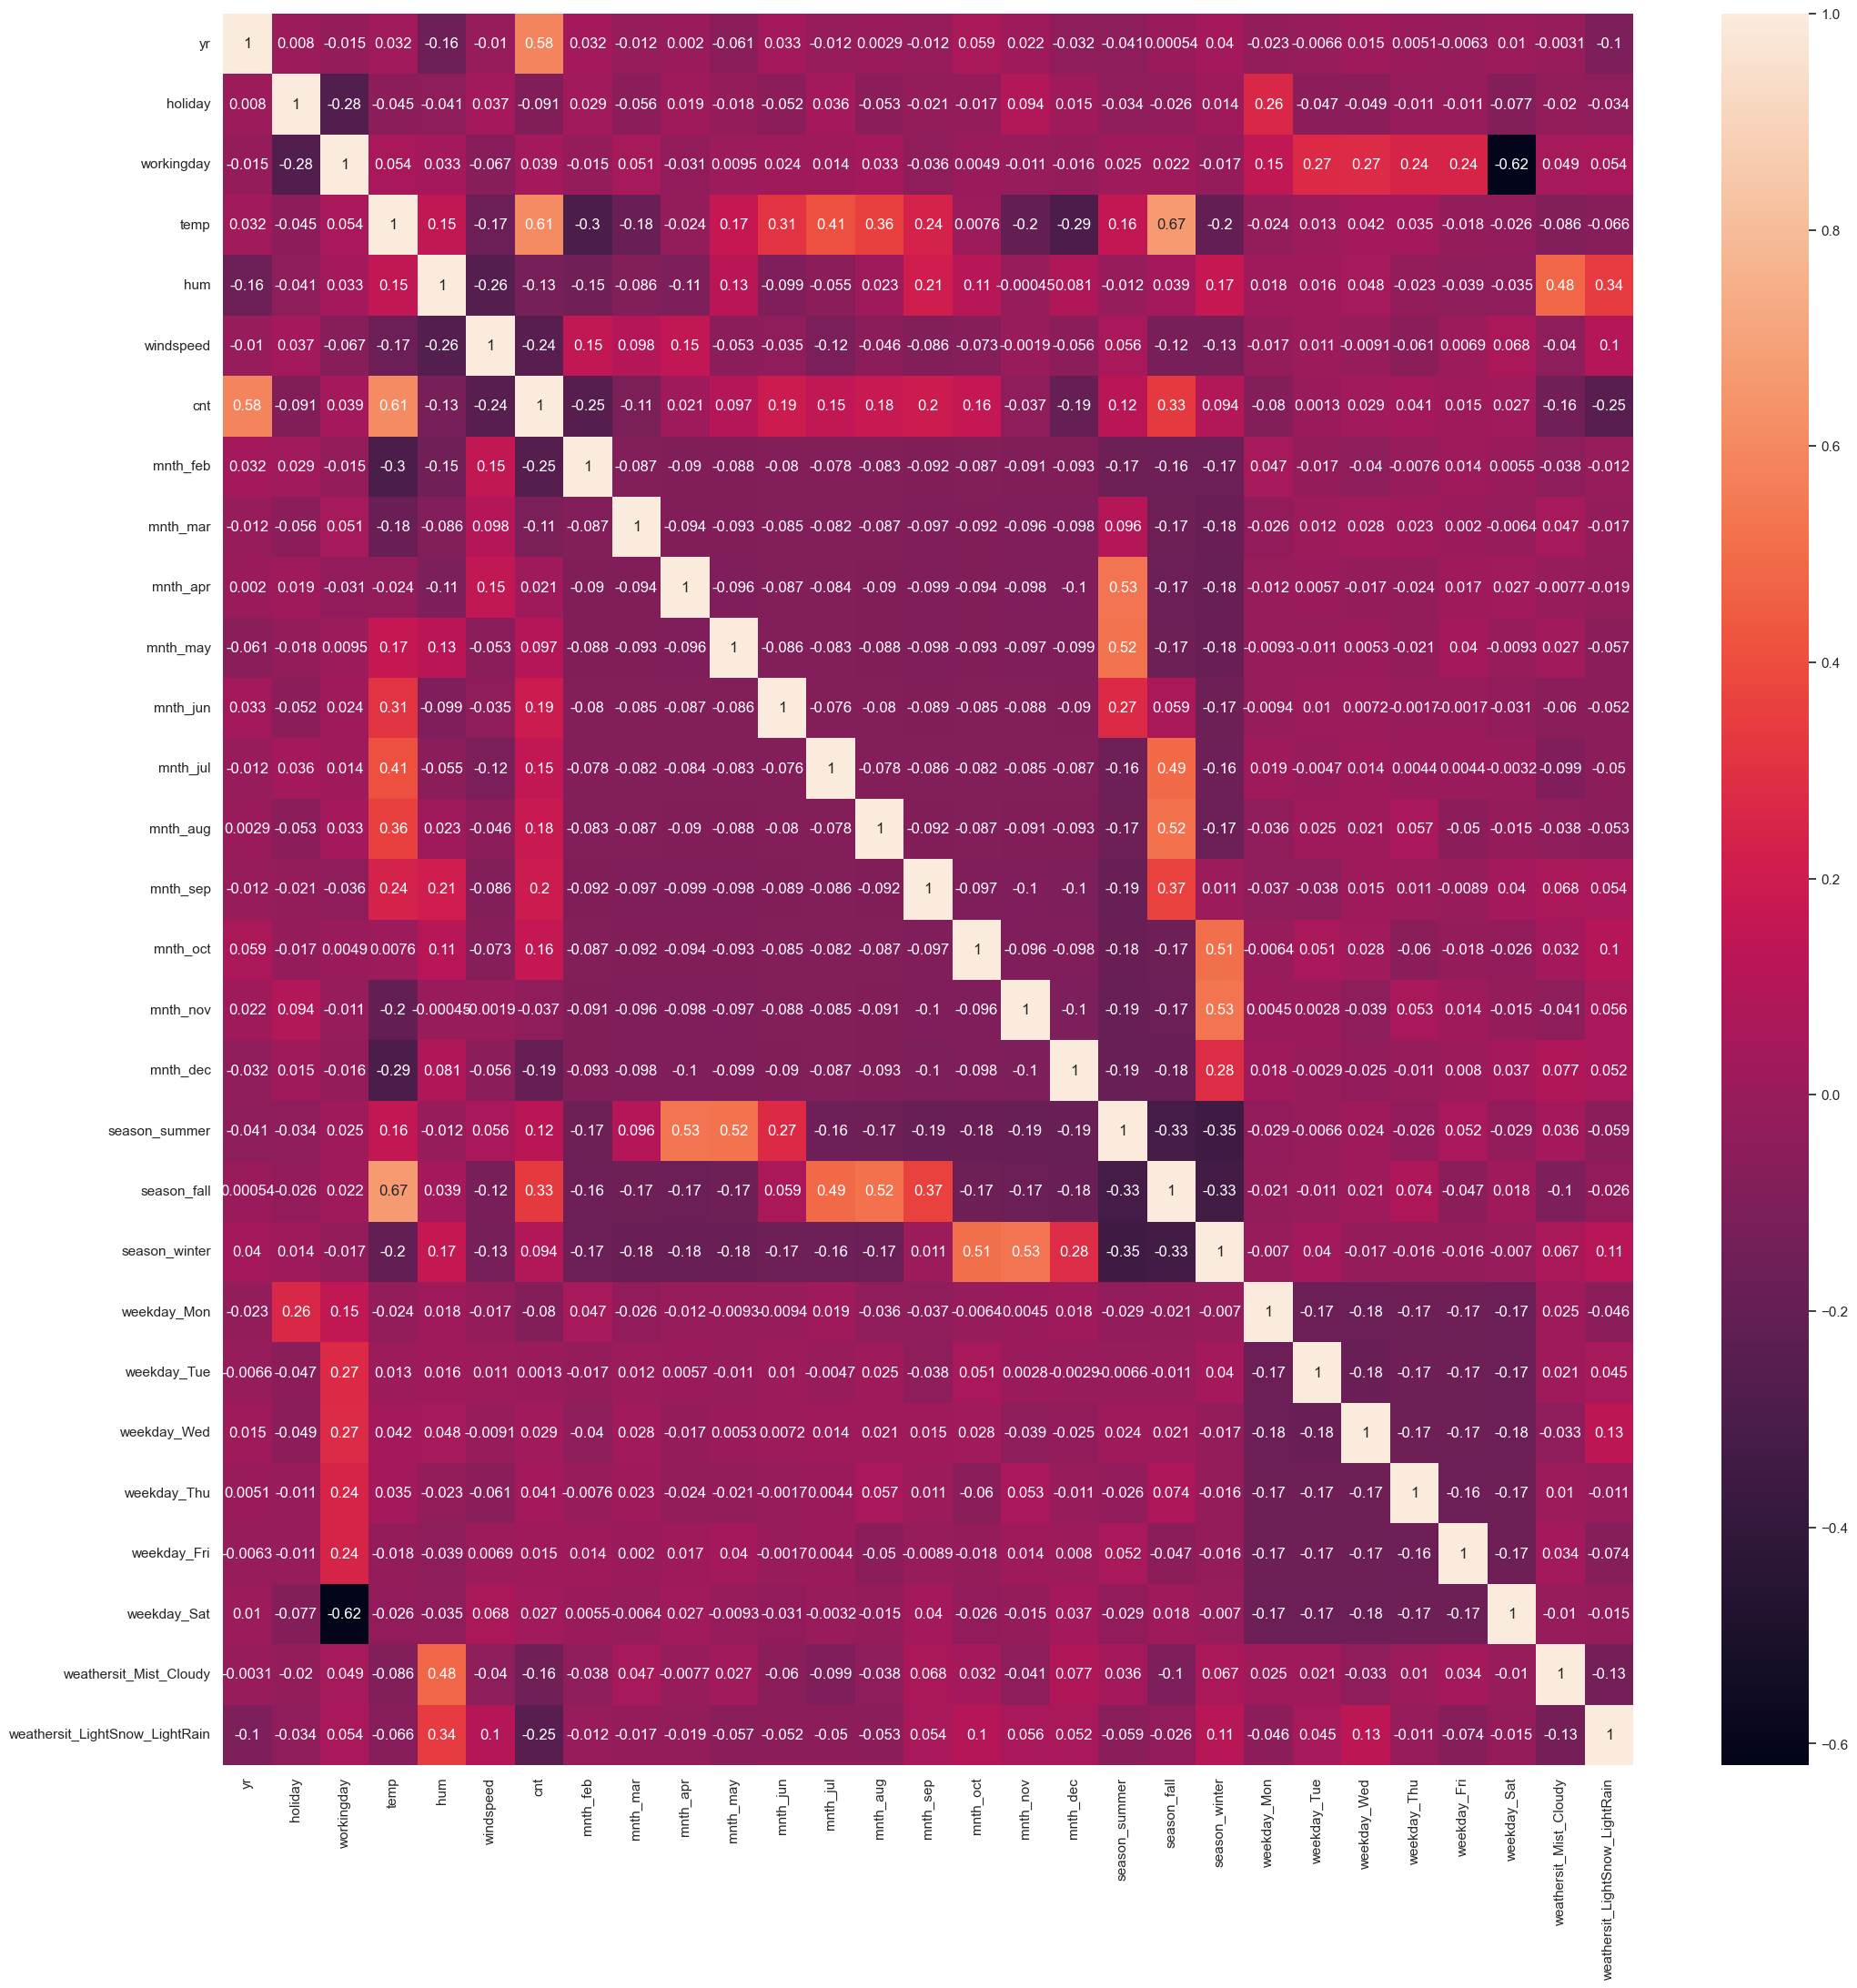

In [49]:
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

##### Scaling - Test data

In [50]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_feb,mnth_mar,mnth_apr,...,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0,24.429153,86.5417,14.291100,4459,0,0,0,...,1,0,0,0,0,0,0,1,0,1
374,1,0,1,12.656536,64.6522,12.565984,3598,0,0,0,...,0,0,0,1,0,0,0,0,0,0
181,0,0,1,29.622500,39.6250,6.874736,5362,0,0,0,...,1,0,0,0,0,0,1,0,0,0
529,1,0,1,26.581653,56.9583,17.000111,7363,0,0,0,...,0,0,0,0,0,1,0,0,0,0
233,0,0,1,28.358347,47.0000,18.542250,4758,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [51]:
df_test[numeric_variables] = minMaxScaler.transform(df_test[numeric_variables])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_feb,mnth_mar,mnth_apr,...,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0,0.652175,0.863516,0.393568,0.486297,0,0,0,...,1,0,0,0,0,0,0,1,0,1
374,1,0,1,0.276477,0.584521,0.340487,0.382349,0,0,0,...,0,0,0,1,0,0,0,0,0,0
181,0,0,1,0.817910,0.265533,0.165370,0.595316,0,0,0,...,1,0,0,0,0,0,1,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,0.836895,0,0,0,...,0,0,0,0,0,1,0,0,0,0
233,0,0,1,0.777567,0.359532,0.524373,0.522395,0,0,0,...,1,0,1,0,0,0,0,0,0,0


#### Prepare X (Features) and Y (Out) dataframes

#### X and Y dataframes - Train

In [52]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,mnth_feb,mnth_mar,mnth_apr,mnth_may,...,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
72,0,0,1,0.298094,0.393891,0.236118,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
510,1,0,0,0.778657,0.694105,0.364071,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
700,1,0,0,0.327249,0.809877,0.210252,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
264,0,0,1,0.694699,0.910249,0.217975,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
577,1,0,1,0.811368,0.624004,0.244886,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [53]:
y_train.head()

72     0.194978
510    0.737052
700    0.509236
264    0.526862
577    0.863093
Name: cnt, dtype: float64

#### X and Y dataframes - Test

In [54]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,mnth_feb,mnth_mar,mnth_apr,mnth_may,...,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0,0.652175,0.863516,0.393568,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
374,1,0,1,0.276477,0.584521,0.340487,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
181,0,0,1,0.817910,0.265533,0.165370,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
233,0,0,1,0.777567,0.359532,0.524373,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [55]:
y_test.head()

566    0.486297
374    0.382349
181    0.595316
529    0.836895
233    0.522395
Name: cnt, dtype: float64

## Data modeling using Linear Regression


#### Steps
- Create LinearRegression() object
- Fit model for train data
- Run RFE and do feature selection to select best 15 features
- Use **statsmodel** to build model 
    - utlize the detailed statistics (R-squared and Adj. R-squared,P-values , VIF(for Multicollinearity)) to Drop columns 
    - Repeat
- Do Residual Analysis
- Predictions and Model Evaluation 
- Derieve the Best Fit Line


In [56]:
### List All available Train Dataset
list(X_train.columns)

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'mnth_feb',
 'mnth_mar',
 'mnth_apr',
 'mnth_may',
 'mnth_jun',
 'mnth_jul',
 'mnth_aug',
 'mnth_sep',
 'mnth_oct',
 'mnth_nov',
 'mnth_dec',
 'season_summer',
 'season_fall',
 'season_winter',
 'weekday_Mon',
 'weekday_Tue',
 'weekday_Wed',
 'weekday_Thu',
 'weekday_Fri',
 'weekday_Sat',
 'weathersit_Mist_Cloudy',
 'weathersit_LightSnow_LightRain']

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
# Use RFE to select best 15 variables

rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)



In [59]:
# Return 15 Features
rfe_col = X_train.columns[rfe.support_]


#### Following columns are best 15 features left after the Recusive feature elemination

In [60]:
list(rfe_col)

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'mnth_mar',
 'mnth_may',
 'mnth_aug',
 'mnth_sep',
 'mnth_oct',
 'season_summer',
 'season_fall',
 'season_winter',
 'weathersit_Mist_Cloudy',
 'weathersit_LightSnow_LightRain']

## Use **statsmodel** to build model

In [61]:
# Extract 15 features selected to a new Dataframe  after running RFE
X_train_after_rfe = X_train[rfe_col]

In [62]:
X_train_after_rfe.head()

,yr,holiday,temp,hum,windspeed,mnth_mar,mnth_may,mnth_aug,mnth_sep,mnth_oct,season_summer,season_fall,season_winter,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
72,0,0,0.298094,0.393891,0.236118,1,0,0,0,0,0,0,0,0,0
510,1,0,0.778657,0.694105,0.364071,0,1,0,0,0,1,0,0,0,0
700,1,0,0.327249,0.809877,0.210252,0,0,0,0,0,0,0,1,1,0
264,0,0,0.694699,0.910249,0.217975,0,0,0,1,0,0,1,0,1,0
577,1,0,0.811368,0.624004,0.244886,0,0,1,0,0,0,1,0,0,0


In [63]:
X_train_after_rfe.describe()

,yr,holiday,temp,hum,windspeed,mnth_mar,mnth_may,mnth_aug,mnth_sep,mnth_oct,season_summer,season_fall,season_winter,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.033333,0.513354,0.563841,0.342904,0.084314,0.086275,0.076471,0.092157,0.084314,0.256863,0.235294,0.260784,0.345098,0.033333
std,0.500429,0.179682,0.233194,0.183851,0.162760,0.278131,0.281045,0.266010,0.289531,0.278131,0.437332,0.424599,0.439494,0.475867,0.179682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.314983,0.426048,0.225964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.506613,0.562400,0.322431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.721686,0.697621,0.434281,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
# Create the Initial model with first 15 features
X_train_sm = sm.add_constant(X_train_after_rfe)

# create a fitted model (1st model)
lm_first = sm.OLS(y_train,X_train_sm).fit()

In [65]:
print(lm_first.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.5
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.39e-189
Time:                        00:39:21   Log-Likelihood:                 489.38
No. Observations:                 510   AIC:                            -946.8
Df Residuals:                     494   BIC:                            -879.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Check the P Values of the features
- we can remove the features with p-value above 5% (0.05)

#### Steps
- 1.Check P values greater than 0.05
- 2.Remove the feature from train dataframe
- 3.remodel with remaining features
- 4.back to step-1 

In [66]:
pvalue = lm_first.pvalues

In [67]:
list(pvalue)

[1.0143190060312034e-14,
 1.0628056696067092e-108,
 0.00028375359297328753,
 1.0301868852882882e-34,
 3.039463995389831e-07,
 9.373428714621916e-10,
 0.001607665948064399,
 0.054026211893023146,
 0.05109824961709708,
 3.249765183817278e-10,
 6.0125541126657776e-05,
 3.918614031741355e-17,
 9.247758296902051e-05,
 5.9591958676686e-29,
 5.532778972673235e-06,
 7.69049430916225e-12]

In [68]:
while(max(pvalue)>0.05):
    max_p_var = pvalue[pvalue == pvalue.max()].index
    print( max_p_var[0], '  has P value: ', round(max(pvalue),3), ' which is greater than 0.05, hence this feature to be removed.')

    X_train_after_rfe = X_train_after_rfe.drop(max_p_var, axis = 1) # Feature removal from the DF
    X_train_sm = sm.add_constant(X_train_after_rfe)
    lm_next = sm.OLS(y_train,X_train_sm).fit()
    pvalue = lm_next.pvalues   

mnth_may   has P value:  0.054  which is greater than 0.05, hence this feature to be removed.
mnth_aug   has P value:  0.056  which is greater than 0.05, hence this feature to be removed.


In [69]:
print(lm_next.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          4.51e-190
Time:                        00:39:21   Log-Likelihood:                 485.58
No. Observations:                 510   AIC:                            -943.2
Df Residuals:                     496   BIC:                            -883.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Observations

- Two features **mnth_may** and **mnth_aug** has been removed as they had p-value greater than 0.05.
- The process of removal has been completed in 2 iterations.
- During the 1st iteration **mnth_may** had a p-value of 0.054 and it has been removed. On the 2nd iteration **mnth_aug** had a p-value of 0.056 hence it got removed.
- There are 13 features remaining after the removing high p-value features.
- **R2** = 0.843 and **Adj-R2** = 0.839.

### Using VIF to indentify and handle Multicollinearity

#### Define a reusable function to calculate VIF values

In [70]:
def cacluate_vif_for_model(X_data):
    vif = pd.DataFrame()
    vif['Features'] = X_data.columns
    vif['VIF'] = [variance_inflation_factor(X_data.values, i) for i in range(X_data.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

#### Run VIF on the current train model

In [71]:
print(cacluate_vif_for_model(X_train_after_rfe))

                          Features    VIF
2                             temp  19.22
3                              hum  12.09
9                      season_fall   6.28
4                        windspeed   3.76
8                    season_summer   3.54
10                   season_winter   2.99
11          weathersit_Mist_Cloudy   2.34
0                               yr   1.98
7                         mnth_oct   1.59
12  weathersit_LightSnow_LightRain   1.37
6                         mnth_sep   1.36
5                         mnth_mar   1.19
1                          holiday   1.04


### Observations
- **temp** feature has a very high VIF value of **19.22** and **hum** has the next highest VIF value.
- Our previous corelation analysis indicates that the **temp** feature is highly corelated to out variable **cnt** further from  business cases it's clear that the **temp** is a critical feature. Hence this feature should be retained regardless of the high VIF value.
- **hum** has a VIF value of **12.09** which is greater than standard VIF threshold 0.5. Hence this feature can be dropped.

### Remove the **hum** feature and remodel

In [72]:
X_train_new = X_train_after_rfe.drop(['hum'],axis = 1)

In [73]:

X_train_sm = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_sm).fit()


In [74]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.3
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.17e-186
Time:                        00:39:21   Log-Likelihood:                 474.04
No. Observations:                 510   AIC:                            -922.1
Df Residuals:                     497   BIC:                            -867.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Observations
- **R2** = 0.836 (Before 0.843) and **Adj-R2** = 0.832 (Before 0.839).
- There is no sigificant change in **R2** and **Adj-R2** which confirms **hum** not significant for the model.
- **p-value** of all the features are < 0.05.

#### Run VIF on the current train model

In [75]:
print(cacluate_vif_for_model(X_train_new))

                          Features    VIF
2                             temp  13.50
8                      season_fall   6.08
3                        windspeed   3.56
7                    season_summer   3.52
9                    season_winter   2.87
0                               yr   1.98
6                         mnth_oct   1.57
10          weathersit_Mist_Cloudy   1.53
5                         mnth_sep   1.35
4                         mnth_mar   1.18
11  weathersit_LightSnow_LightRain   1.11
1                          holiday   1.04


### Observations
- **temp** still have a high VIF but we need to retain this feature as explained before.
- **season_fall** has VIF value of 6.08 (> 5) hence we can drop this feature and redo the modeling process. 

### Remove the **season_fall** feature and remodel

In [76]:
X_train_new = X_train_new.drop(['season_fall'],axis = 1)

In [77]:
# Create stats model and look for summary
X_train_sm = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train,X_train_sm).fit()

In [78]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.0
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          5.89e-182
Time:                        00:39:21   Log-Likelihood:                 460.73
No. Observations:                 510   AIC:                            -897.5
Df Residuals:                     498   BIC:                            -846.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Observations
- **R2** = 0.836 (Before 0.827) and **Adj-R2** = 0.824 (Before 0.832).
- There is no sigificant change in **R2** and **Adj-R2** which confirms **season_fall** not significant for the model.
- **p-value** of all the features are < 0.05.


#### Run VIF on the current train model

In [79]:
print(cacluate_vif_for_model(X_train_new))

                          Features   VIF
2                             temp  3.85
3                        windspeed  3.46
0                               yr  1.97
8                    season_winter  1.91
7                    season_summer  1.64
6                         mnth_oct  1.54
9           weathersit_Mist_Cloudy  1.53
5                         mnth_sep  1.30
4                         mnth_mar  1.16
10  weathersit_LightSnow_LightRain  1.11
1                          holiday  1.04


### Observations
- **VIF** values of all the fatures are < 5.
- Since **p-value** and **VIF** are below threshold our next steps would be focuing on removal high p-values and remodeling and anylising the results based on the **R2** and **Adj-R2** value changes.
- Based on the streagy we would remove **mnth_mar** ( of pvalue 0.019) and analyse the effect on **R2** and **Adj-R2**.

### Remove the '**mnth_mar**' feature and remodel

In [80]:
X_train_new = X_train_new.drop(['mnth_mar'],axis = 1)

In [81]:
X_train_sm = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train,X_train_sm).fit()

In [82]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.9
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          5.83e-182
Time:                        00:39:22   Log-Likelihood:                 457.90
No. Observations:                 510   AIC:                            -893.8
Df Residuals:                     499   BIC:                            -847.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Observations
- **R2** = 0.825 (Before 0.836) and **Adj-R2** = 0.822 (Before 0.832).
- There is no sigificant change in **R2** and **Adj-R2** which confirms **mnth_mar** not significant for the model.
- **p-value** of all the features are < 0.05.

#### Run VIF on the current train model

In [83]:
print(cacluate_vif_for_model(X_train_new))

                         Features   VIF
2                            temp  3.82
3                       windspeed  3.30
0                              yr  1.96
7                   season_winter  1.88
6                   season_summer  1.63
5                        mnth_oct  1.54
8          weathersit_Mist_Cloudy  1.51
4                        mnth_sep  1.30
9  weathersit_LightSnow_LightRain  1.11
1                         holiday  1.04


### Observations
- **VIF** values of all the fatures are < 5.
- Since **p-value** and **VIF** are below threshold our next steps would be focuing on removal high p-values and remodeling and anylising the results based on the **R2** and **Adj-R2** value changes.
- Based on the streagy we would remove **mnth_oct** ( of pvalue 0.002) and analyse the effect on **R2** and **Adj-R2**.

### Remove the '**mnth_oct**' feature and remodel

In [84]:
X_train_new = X_train_new.drop(['mnth_oct'],axis = 1)

In [85]:
X_train_sm = sm.add_constant(X_train_new)
lm_5 = sm.OLS(y_train,X_train_sm).fit()

In [86]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.8
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          3.57e-181
Time:                        00:39:22   Log-Likelihood:                 453.17
No. Observations:                 510   AIC:                            -886.3
Df Residuals:                     500   BIC:                            -844.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Observations
- **R2** = 0.822 (Before 0.825) and **Adj-R2** = 0.819 (Before 0.822).
- There is no sigificant change in **R2** and **Adj-R2** which confirms **mnth_oct** not significant for the model.
- **p-value** of all the features are < 0.05.

#### Run VIF on the current train model

In [87]:
print(cacluate_vif_for_model(X_train_new))

                         Features   VIF
2                            temp  3.75
3                       windspeed  3.28
0                              yr  1.96
5                   season_summer  1.63
7          weathersit_Mist_Cloudy  1.51
6                   season_winter  1.44
4                        mnth_sep  1.26
8  weathersit_LightSnow_LightRain  1.11
1                         holiday  1.04


### Observations
- **VIF** values of all the fatures are < 5.
- **p-value** and **VIF** are below threshold.
- As there is no sigificant change in R2 and Adj-R2 and VIP and p-values are settled under threshold and we can finalize this model and focus on evaulating this on test data.

In [88]:
# Remaining features in the final model
list(lm_5.params.index)

['const',
 'yr',
 'holiday',
 'temp',
 'windspeed',
 'mnth_sep',
 'season_summer',
 'season_winter',
 'weathersit_Mist_Cloudy',
 'weathersit_LightSnow_LightRain']

In [89]:
final_features = list(lm_5.params.index)

In [90]:
final_features.remove('const')

In [91]:
print('Features Selected in the Final Model:', final_features)


Features Selected in the Final Model: ['yr', 'holiday', 'temp', 'windspeed', 'mnth_sep', 'season_summer', 'season_winter', 'weathersit_Mist_Cloudy', 'weathersit_LightSnow_LightRain']


### List down the Coefficent of final features

In [92]:
print('Features Selected in the Final Model:', final_features)

Features Selected in the Final Model: ['yr', 'holiday', 'temp', 'windspeed', 'mnth_sep', 'season_summer', 'season_winter', 'weathersit_Mist_Cloudy', 'weathersit_LightSnow_LightRain']


In [93]:
print(round(lm_5.params,3))

const                             0.097
yr                                0.256
holiday                          -0.097
temp                              0.552
windspeed                        -0.135
mnth_sep                          0.093
season_summer                     0.092
season_winter                     0.143
weathersit_Mist_Cloudy           -0.085
weathersit_LightSnow_LightRain   -0.264
dtype: float64


## Residual analysis

##### Assumptions of simple linear regression to validate

- Linear relationship between X and y.
- Normal distribution of error terms.
- Independence of error terms.
- Constant variance of error terms(homoscedasticity).

In [94]:
X_train_res = X_train[final_features]

In [95]:
X_train_res = sm.add_constant(X_train_res)
y_train_pred = lm_5.predict(X_train_res)

### y_train vs y_train_pred

Text(0, 0.5, 'y_train_pred')

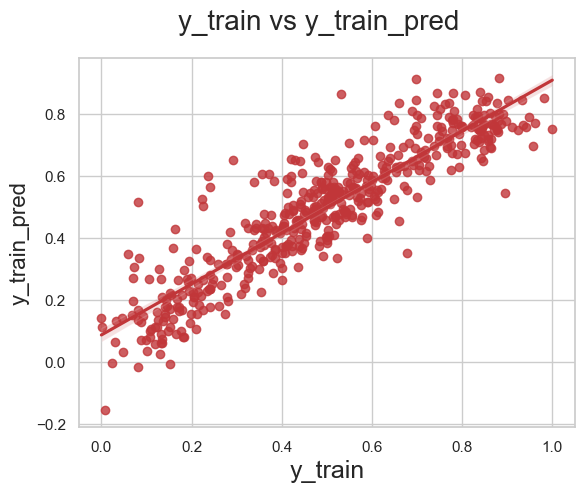

In [96]:

fig = plt.figure()
sns.regplot(x=y_train, y=y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20) 
plt.xlabel('y_train', fontsize = 18)         
plt.ylabel('y_train_pred', fontsize = 16)  

##### Use displots and observe the Error Terms

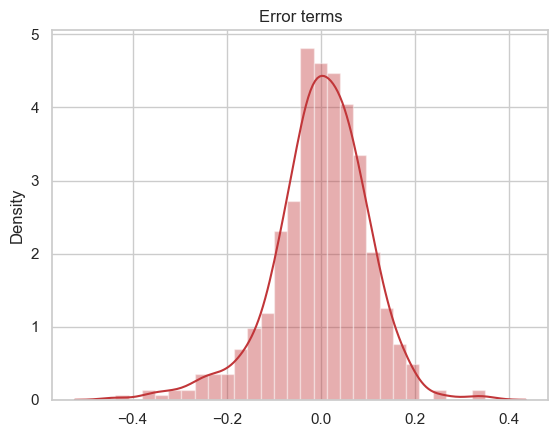

In [97]:
residual = y_train - y_train_pred
sns.distplot(residual)
plt.title('Error terms')
plt.show()

#### Observation
- Error Terms are has a **normal distribution** with mean **0.0**.


##### Plot the error terms aginst the Predictions to if check any trends

Text(0, 0.5, 'Residual')

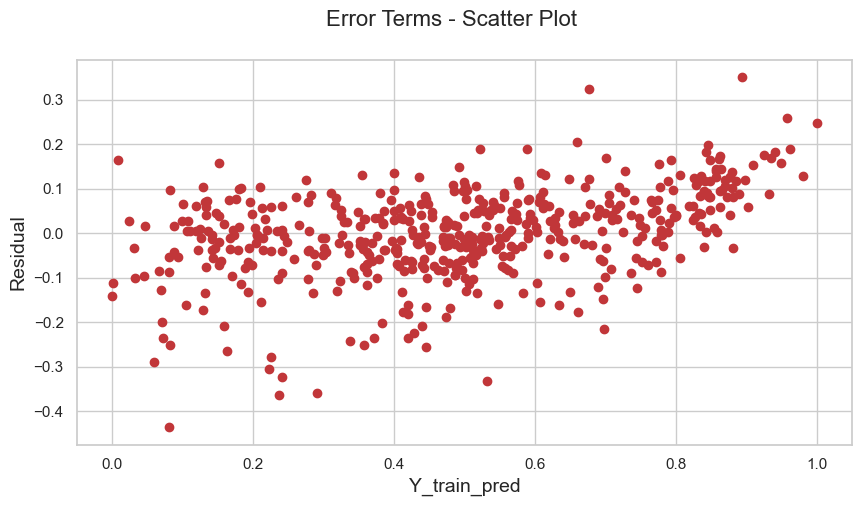

In [98]:
fig = plt.figure(figsize=(10,5))
plt.scatter(y_train,residual)
fig.suptitle('Error Terms - Scatter Plot', fontsize=16)
plt.xlabel('Y_train_pred', fontsize=14)
plt.ylabel('Residual', fontsize=14)   

### Observations
- Residual plot against the Y prediction looks random.
- Error terms variance looks constant and there isn't any patterns observed.


## Predict and Evaluate the model using the test dataset

### Use the model to predict

In [99]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,mnth_feb,mnth_mar,mnth_apr,mnth_may,...,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0,0.652175,0.863516,0.393568,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
374,1,0,1,0.276477,0.584521,0.340487,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
181,0,0,1,0.817910,0.265533,0.165370,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
233,0,0,1,0.777567,0.359532,0.524373,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [100]:
# Extract the Final selected Featured from the test data set
X_test_sm = X_test[final_features]
X_test_sm.head()

,yr,holiday,temp,windspeed,mnth_sep,season_summer,season_winter,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0.652175,0.393568,0,0,0,0,1
374,1,0,0.276477,0.340487,0,0,0,0,0
181,0,0,0.817910,0.165370,0,0,0,0,0
529,1,0,0.720868,0.476922,0,1,0,0,0
233,0,0,0.777567,0.524373,0,0,0,0,0


In [101]:
# Prepare constant column
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,mnth_sep,season_summer,season_winter,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1.0,1,0,0.652175,0.393568,0,0,0,0,1
374,1.0,1,0,0.276477,0.340487,0,0,0,0,0
181,1.0,0,0,0.817910,0.165370,0,0,0,0,0
529,1.0,1,0,0.720868,0.476922,0,1,0,0,0
233,1.0,0,0,0.777567,0.524373,0,0,0,0,0


In [102]:
y_test_pred = lm_5.predict(X_test_sm)

### Evaulate the model on predicted test data

#### Steps
- Calculate R2 and Adj-R2
- Calculate Mean Sqr Error
- Calculate the Residuals
- Plot Distribution plot of the residuals and confirm if error terms normaly distributed
- Plot Scatter plot diagram of Residuals vs Predicted Test data values to observe if error terms holds Linear regression assumptions.
- Plot "Y Test" against "Predicted Y Test" observe any patterns

In [103]:
## R2

r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_test

0.8148170762002062

#### Adjusted R2 

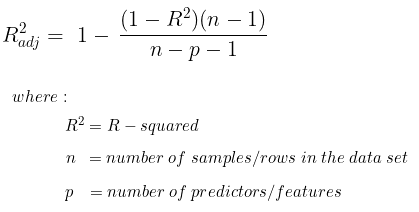



In [104]:
# sample size
N = len(X_test)     
# Number of independent variable
p =len(final_features)     
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)

In [105]:
print('Adjusted. R-Squared ', round(r2_test_adj,3))

Adjusted. R-Squared  0.807


In [106]:
# Calculate Mean Squared Error
mean_sq_error = mean_squared_error(y_test, y_test_pred)

In [107]:
print('Mean Squared Error :' ,round(mean_sq_error,5))

Mean Squared Error : 0.00962


#### Caclculate Residuals and plot dist plot for Error Terms

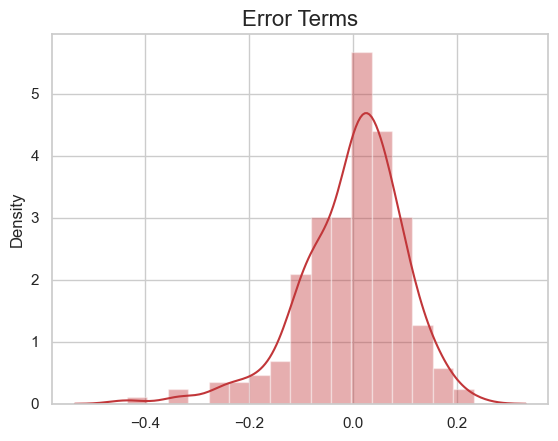

In [108]:
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()


#### Observation
- Error Terms are has a **normal distribution** with mean **0.0**.


#### Scatter plot the residuals against the Prediction done on Test data (Y_test_pred)
- Observe if the Error terms hold the linear regression assumptions

Text(0, 0.5, 'Residual')

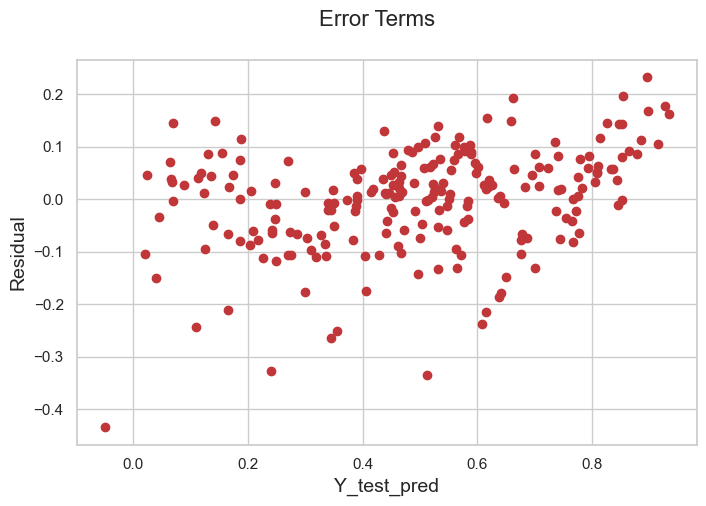

In [109]:
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=16)    
plt.xlabel('Y_test_pred', fontsize=14)
plt.ylabel('Residual', fontsize=14)   

### Observations
- Residual plot against the Y prediction looks random.
- Error terms variance looks constant and there isn't any patterns observed.


### y_test vs y_test_pred

Text(0, 0.5, 'y_test_pred')

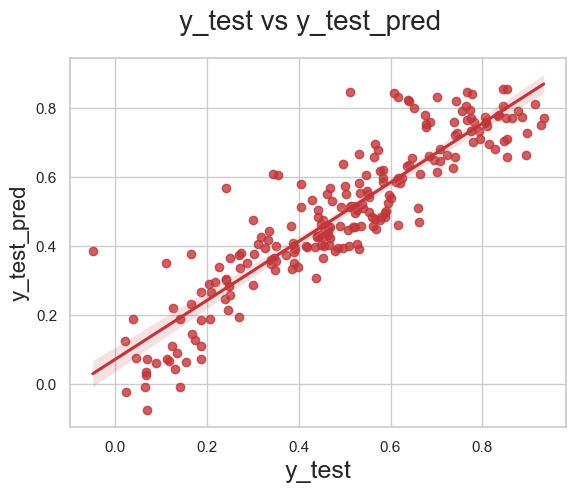

In [110]:
fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)         
plt.ylabel('y_test_pred', fontsize = 16)  

#### Conclusion
- **y_test vs y_test_pred** is very much aligned with **y_train vs y_train_pred** for our final linear regression model **lm_5** and this model has decent prediction power.

### Final Conclusions


### R2 and Adjusted R-squared score


In [111]:
print('Train R-Score:        ' ,round(lm_5.rsquared,3))
print('Train Adj. R-Squared: ' ,round(lm_5.rsquared_adj,3) )
print('Test R-Score:         ' ,round(r2_test,3))
print('Test Adj. R-Squared:  ' ,round(r2_test_adj,3))
print('Train vs Test Accuracy difference ', round((lm_5.rsquared_adj - r2_test_adj), 3) * 100 ,'%')

Train R-Score:         0.822
Train Adj. R-Squared:  0.819
Test R-Score:          0.815
Test Adj. R-Squared:   0.807
Train vs Test Accuracy difference  1.2 %


- This model has a Accuracy of 81.9%.
- Accuracy score on the test data is around 80.7% which is close to and consistent with train data.

##### Significant features to predict the demand for shared bikes 

In [112]:
print(round(lm_5.params,3))

const                             0.097
yr                                0.256
holiday                          -0.097
temp                              0.552
windspeed                        -0.135
mnth_sep                          0.093
season_summer                     0.092
season_winter                     0.143
weathersit_Mist_Cloudy           -0.085
weathersit_LightSnow_LightRain   -0.264
dtype: float64


### Best Fitted line equation for the the final linear regression model lm_5

**cnt** = 
   0.097+(0.256 × **yr**) + (0.097 × **holiday** )    + (0.552 × **temp**) − (0.135 × **windspeed** )    + (0.093 × **mnth_sep**) + ( 0.092 × **season_summer**)    + (0.143 × **season_winter** ) − (0.085 × **weathersit_Mist_Cloudy** ) −( 0.264× **weathersit_LightSnow_LightRain**)

- Temperature with is 0.552 coefficient is the most influencing feature which contributes postively to the Bike rental demand.

- Some weather conditions negatively influence the Bike rental business.
    
    - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  --> coefficient = -0.085 
	- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds --> coefficient = -0.264

    - Boom Bike company can research further on whether they can improve the demand during these weather condtions.

-  **Winter** (coefficient = 0.143) and **Summer** (coefficient = 0.092) has better demand for bikes compare to other seasons. Boom bikes company may focus utlizing these seasons by scaling the businss while researching on improving the demands during other seasons.

- Demand for Boom bikes rental has been increased in 2019 compare to 2018 hence the company should scale the business to accomedate future demands.

- With the current rate on the same conditions BOOM Bikes can expect their business to grow by 9.7% without marketing efforts

## Top 3 predictor features influencing the Boom Bike Rental business

Following 3 are the most influencing variables it's recommended to give high importance to these three variables for to maximize the demand and reveue.

- Temperature (Temp)  --> Postive influence
- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (weathersit =3) --> (negative influence)
- Year (yr) --> Postive influence